In [1]:
#Part 1: Foundational Data Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from statistics import mean, median, mode, stdev
from scipy.stats import skew
import seaborn as sns
from numpy import percentile


df = pd.read_csv("DSI_kickstarterscrape_dataset.csv")  

print(df.head(2) ) 

   project id                                  name  \
0       39409                 WHILE THE TREES SLEEP   
1      126581  Educational Online Trading Card Game   

                                                 url      category  \
0  http://www.kickstarter.com/projects/emiliesaba...  Film & Video   
1  http://www.kickstarter.com/projects/972789543/...         Games   

          subcategory       location      status     goal  pledged  \
0          Short Film   Columbia, MO  successful  10500.0  11545.0   
1  Board & Card Games  Maplewood, NJ      failed   4000.0     20.0   

   funded percentage  backers                      funded date  levels  \
0           1.099524       66  Fri, 19 Aug 2011 19:28:17 -0000       7   
1           0.005000        2  Mon, 02 Aug 2010 03:59:00 -0000       5   

                          reward levels  updates  comments  duration  
0  $25,$50,$100,$250,$500,$1,000,$2,500       10         2     30.00  
1                     $1,$5,$10,$25,$50        

In [2]:
df["pledged"].mean()

4980.749678963979

In [10]:
df.describe()

,project id,goal,pledged,funded percentage,backers,levels,updates,comments,duration
count,4.595700e+04,4.595700e+04,4.594500e+04,45957.000000,45957.000000,45957.000000,45957.00000,45957.000000,45957.000000
mean,1.080800e+09,1.194271e+04,4.980750e+03,1.850129,69.973192,8.004939,4.08508,8.379529,39.995547
std,6.218057e+08,1.887583e+05,5.674162e+04,88.492706,688.628479,4.233907,6.43922,174.015737,17.414458
min,3.940900e+04,1.000000e-02,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,5.438962e+08,1.800000e+03,1.960000e+02,0.044000,5.000000,5.000000,0.00000,0.000000,30.000000
50%,1.078345e+09,4.000000e+03,1.310000e+03,1.000000,23.000000,7.000000,2.00000,0.000000,32.000000
75%,1.621596e+09,9.862000e+03,4.165000e+03,1.115640,59.000000,10.000000,6.00000,3.000000,48.390000
max,2.147460e+09,2.147484e+07,1.026684e+07,15066.000000,87142.000000,80.000000,149.00000,19311.000000,91.960000


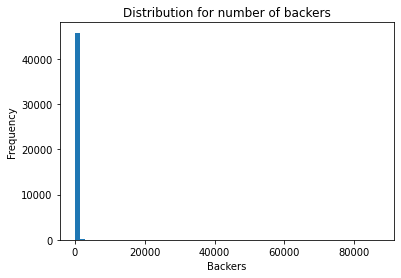

In [9]:
plt.hist(df["backers"], bins = 60)
plt.xlabel('Backers')
plt.ylabel('Frequency')
plt.title('Distribution for number of backers')
plt.show()

In [15]:
print(df.skew())

project id            -0.006630
goal                 101.512992
pledged              138.501466
funded percentage    140.811735
backers               87.473974
levels                 2.573258
updates                4.002831
comments              69.315678
duration               1.078027
dtype: float64


In [6]:
print("Mode is: ", df["backers"].mode())
print("Median is: ", df["backers"].median())
print("Mean is: ", df["backers"].mean())

Mode is:  0    0
dtype: int64
23.0
69.97319233196248


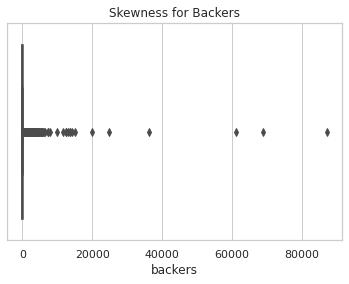

In [39]:
sns.boxplot(x=df["backers"])
plt.title("Skewness for Backers")
plt.show()

In [2]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y
normalized = normalize(df["backers"])
normalized.describe()


count    45957.000000
mean         0.000803
std          0.007902
min          0.000000
25%          0.000057
50%          0.000264
75%          0.000677
max          1.000000
Name: backers, dtype: float64

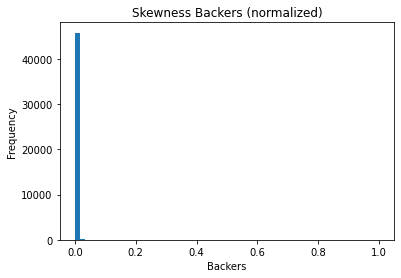

In [3]:
plt.hist(normalized, bins = 60)
plt.xlabel('Backers')
plt.ylabel('Frequency')
plt.title('Skewness Backers (normalized)')
plt.show()

In [17]:
def sigmoid(x):
    e = np.exp(1)
    y = 1/(1+e**(-x))
    return y
sigmoid = sigmoid(df.backers)
sigmoid.describe()

count    4.595700e+04
mean     7.310586e-01
std      2.220470e-16
min      7.310586e-01
25%      7.310586e-01
50%      7.310586e-01
75%      7.310586e-01
max      7.310586e-01
Name: backers, dtype: float64

In [2]:
# interquartile range
q25, q75 = percentile(df.backers, 25), percentile(df.backers, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in df.backers if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in df.backers if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=5.000, 75th=59.000, IQR=54.000
Identified outliers: 3719
Non-outlier observations: 42238


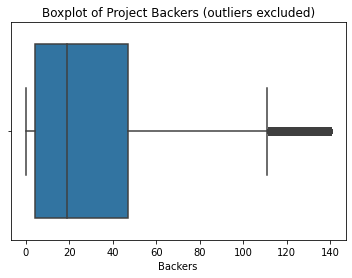

In [4]:
sns.boxplot(x=outliers_removed)
plt.xlabel('Backers')
plt.title('Skewness Backers (outliers removed)')
plt.show()

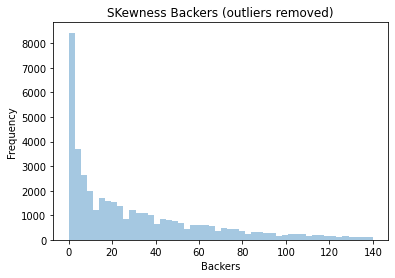

In [5]:
q25, q75 = percentile(df.backers, 25), percentile(df.backers, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
outliers = [x for x in df.backers if x < lower or x > upper]
outliers_removed = [x for x in df.backers if x >= lower and x <= upper]
sns.distplot(outliers_removed, kde=False)
plt.xlabel('Backers')
plt.ylabel('Frequency')
plt.title('SKewness Backers (outliers removed)')
plt.show()

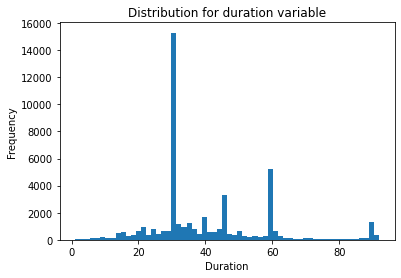

In [9]:
#checking if duration variable is normally distributed
#histogram plot
plt.hist(df["duration"], bins = 60)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Distribution for duration variable')
plt.show()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from statistics import mean, median, mode, stdev
from scipy.stats import skew
import seaborn as sns
from numpy import percentile


df = pd.read_csv("DSI_kickstarterscrape_dataset.csv") 

# Shapiro-Wilk Test

from scipy.stats import shapiro

# normality test
stat, p = shapiro(df.duration)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

# Shapiro-Wilk Test

# normality test
stat, p = shapiro(df.duration)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.885, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.885, p=0.000
Sample does not look Gaussian (reject H0)


In [6]:
# D'Agostino and Pearson's Test
from numpy.random import randn
from scipy.stats import normaltest

# normality test
stat, p = normaltest(df.duration)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=6985.575, p=0.000
Sample does not look Gaussian (reject H0)


In [ ]:
#Part 2: Qualitative Analysis
#2.1 What's the best length of time to run a campaign?
#first we look at correlation between duration and status

In [42]:
#convert status category variables to integer type
mapping = {'successful': 1, 'failed': 0, 'suspended': 0, 'canceled':0, 'live': 0}

new = df.replace({'status': mapping})
new['status'] = new['status'].astype(int)
print(new)


       project id                                               name  \
0           39409                              WHILE THE TREES SLEEP   
1          126581               Educational Online Trading Card Game   
2          138119                                              STRUM   
3          237090  GETTING OVER - One son's search to finally kno...   
4          246101  The Launch of FlyeGrlRoyalty &quot;The New Nam...   
...           ...                                                ...   
45952  2147336747                                  The Dance Project   
45953  2147346811  new album from J-Sw!ft The Adventures of Negro...   
45954  2147367534                                      ELIZABETH REX   
45955  2147369705                     Dragon Keepers IV Book Project   
45956  2147460119                                 Moments of Insight   

                                                     url      category  \
0      http://www.kickstarter.com/projects/emiliesaba...  Fil

In [12]:
np.corrcoef(new['duration'], new['status'])

array([[ 1.        , -0.11681402],
       [-0.11681402,  1.        ]])

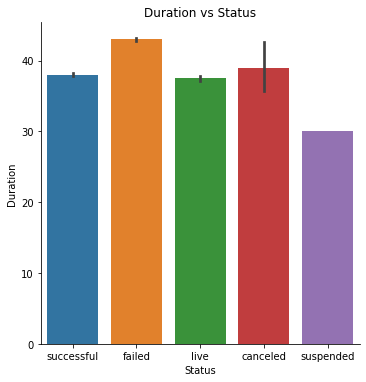

In [11]:
#coefficient of 0.11 show no correlation between duration and status
#plotting the results
sns.catplot(x='status', y='duration', kind = 'bar', data=df)
plt.xlabel('Status')
plt.ylabel('Duration')
plt.title('Duration vs Status')
plt.show()

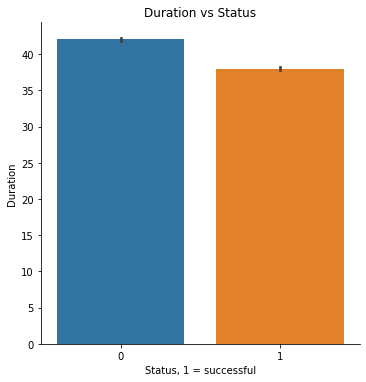

In [15]:
sns.catplot(x='status', y='duration', kind = 'bar', data=new)
plt.xlabel('Status, 1 = successful')
plt.ylabel('Duration')
plt.title('Duration vs Status')
plt.show()

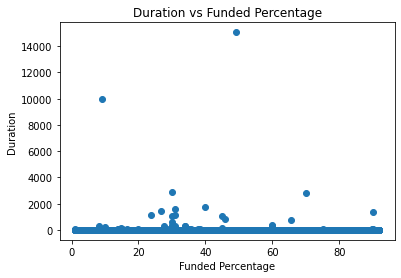

In [27]:
#now we look at duration and funded percentage
#correlation between numeric variables
plt.scatter(df['duration'], df['funded percentage'])
plt.xlabel('Funded Percentage')
plt.ylabel('Duration')
plt.title('Duration vs Funded Percentage')
plt.show()

In [13]:
#the plot suggests abscence of linear relationship
np.corrcoef(df['duration'], df['funded percentage'])

array([[ 1.        , -0.00316407],
       [-0.00316407,  1.        ]])

In [14]:
#coefficients show no correlation between duration and funded percentage
#confirm this with linear regression
from scipy.stats import linregress
linregress(df['duration'], df['funded percentage'])

LinregressResult(slope=-0.016078422823805963, intercept=2.493193912868685, rvalue=-0.0031640688576789317, pvalue=0.4975921729243339, stderr=0.02370439961588123, intercept_stderr=1.0340391967894353)

In [ ]:
#since the p-value is 0.5, there is a 50% chance duration and funded percentage correlate.

In [16]:
#Conclusion: very weak correlation between duration and success

In [17]:
#2.2 What's the ideal pledge goal?

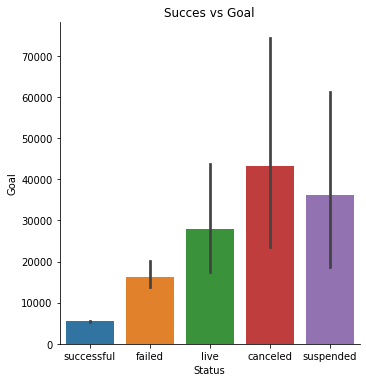

In [28]:
#we do the same analysis as for the duration and success
#plotting the results
sns.catplot(x='status', y='goal', kind = 'bar', data=df)
plt.xlabel('Status')
plt.ylabel('Goal')
plt.title('Succes vs Goal')
plt.show()

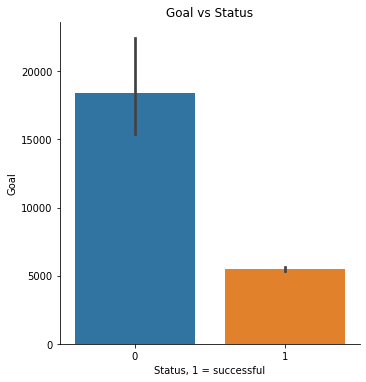

In [19]:
#the graph indicates successful projects asked for less than $10000
sns.catplot(x='status', y='goal', kind = 'bar', data=new)
plt.xlabel('Status, 1 = successful')
plt.ylabel('Goal')
plt.title('Goal vs Status')
plt.show()

In [23]:
#this graph confirms the results

In [29]:
new['goal'] = new['goal'].astype(int)

In [28]:
#confirm this with linear regression
from scipy.stats import linregress
linregress(new['goal'], new['status'])

LinregressResult(slope=-9.06035194720186e-08, intercept=0.5008753363399511, rvalue=-0.034203963743657244, pvalue=2.2263410397976805e-13, stderr=1.234946244433078e-08, intercept_stderr=0.0023356992972438204)

In [30]:
#since the p-value is less than 0.05, the results are statistically significant and correlate between the status and the goal.

In [32]:
#2.3 What type of projects would be most successful at getting funded?

#we look at the correlation between subcategory and status
CrosstabResult=pd.crosstab(index=df['status'],columns=df['subcategory'])
print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

subcategory  Animation  Art  Art Book  Board & Card Games  \
status                                                      
canceled             0    0         0                   0   
failed             233  400       143                  43   
live                48   66        38                  19   
successful         145  610       158                  49   
suspended            0    0         0                   0   

subcategory  Board &amp; Card Games  Children's Book  Classical Music  Comics  \
status                                                                          
canceled                          1                2                1       0   
failed                          167              366              110     448   
live                             62              109               50     104   
successful                      212              176              321     520   
suspended                         0                0                0       0   

subc

In [2]:
# p-value is 0, hence H0 will not be accepted and the variables correlate with each other
mapping = {'successful': 1, 'failed': 0, 'suspended': 0, 'canceled':0, 'live': 0}

new = df.replace({'status': mapping})
new['status'] = new['status'].astype(int)
new['subcategory'].unique().tolist()

['Short Film',
 'Board & Card Games',
 'Animation',
 'Documentary',
 'Fashion',
 'Music',
 'Illustration',
 'Film &amp; Video',
 'Open Software',
 'Indie Rock',
 'Dance',
 'Fiction',
 'Nonfiction',
 'Theater',
 'Games',
 'Art Book',
 'Country & Folk',
 'Comics',
 'Webseries',
 'Technology',
 'Performance Art',
 'Narrative Film',
 'Video Games',
 'Product Design',
 'Rock',
 'Painting',
 'Photography',
 'Conceptual Art',
 'Jazz',
 'Open Hardware',
 'Classical Music',
 'Food',
 'Art',
 'Pop',
 'Journalism',
 'Poetry',
 'Electronic Music',
 'World Music',
 'Sculpture',
 'Publishing',
 "Children's Book",
 'Public Art',
 'Mixed Media',
 'Graphic Design',
 'Hip-Hop',
 'Periodical',
 'Crafts',
 'Design',
 'Digital Art',
 'Board &amp; Card Games',
 'Country &amp; Folk']

In [15]:
#there are repeated sub-categories
# Plot showing rates of success by duration
new['subcategory'] = new['subcategory'].replace(['Country &amp; Folk'], 'Country & Folk')
new['subcategory'] = new['subcategory'].replace(['Board &amp; Card Games'], 'Board & Card Games')
new['subcategory'] = new['subcategory'].replace(['Film &amp; Video'], 'Film & Video')
new['subcategory'].unique().tolist()


['Short Film',
 'Board & Card Games',
 'Animation',
 'Documentary',
 'Fashion',
 'Music',
 'Illustration',
 'Film & Video',
 'Open Software',
 'Indie Rock',
 'Dance',
 'Fiction',
 'Nonfiction',
 'Theater',
 'Games',
 'Art Book',
 'Country & Folk',
 'Comics',
 'Webseries',
 'Technology',
 'Performance Art',
 'Narrative Film',
 'Video Games',
 'Product Design',
 'Rock',
 'Painting',
 'Photography',
 'Conceptual Art',
 'Jazz',
 'Open Hardware',
 'Classical Music',
 'Food',
 'Art',
 'Pop',
 'Journalism',
 'Poetry',
 'Electronic Music',
 'World Music',
 'Sculpture',
 'Publishing',
 "Children's Book",
 'Public Art',
 'Mixed Media',
 'Graphic Design',
 'Hip-Hop',
 'Periodical',
 'Crafts',
 'Design',
 'Digital Art']

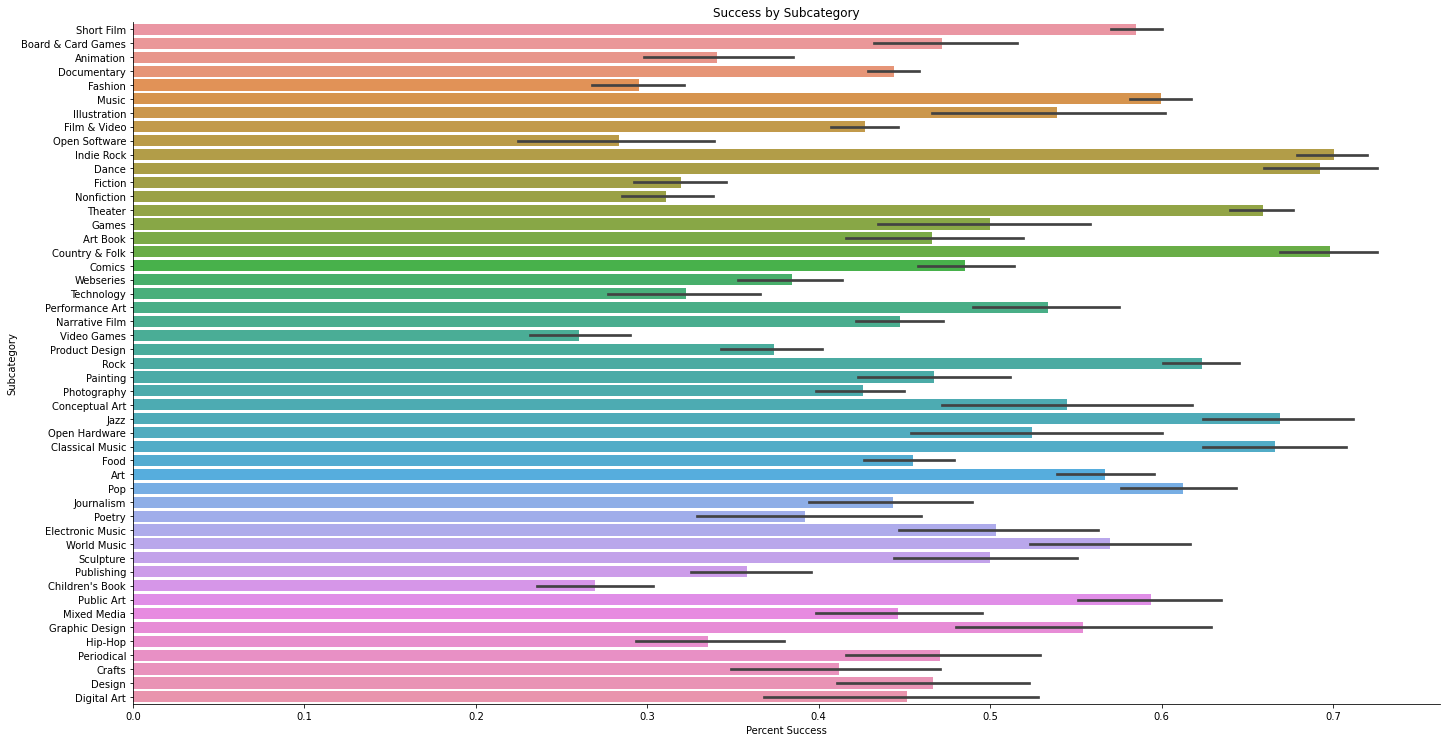

In [4]:
import seaborn as sns
mapping = {'successful': 1, 'failed': 0, 'suspended': 0, 'canceled':0, 'live': 0}

new = df.replace({'status': mapping})
new['status'] = new['status'].astype(int)
new['subcategory'].unique().tolist()
new['subcategory'] = new['subcategory'].replace(['Country &amp; Folk'], 'Country & Folk')
new['subcategory'] = new['subcategory'].replace(['Board &amp; Card Games'], 'Board & Card Games')
new['subcategory'] = new['subcategory'].replace(['Film &amp; Video'], 'Film & Video')

sns.catplot(y='subcategory', x='status', data=new, kind='bar', height=10, aspect=2)
plt.xlabel('Percent Success')
plt.ylabel('Subcategory')
plt.title('Success by Subcategory')
plt.show()

In [4]:
new['category'].unique().tolist()

['Film & Video',
 'Games',
 'Fashion',
 'Music',
 'Art',
 'Technology',
 'Dance',
 'Publishing',
 'Theater',
 'Comics',
 'Design',
 'Photography',
 'Food',
 'Film &amp; Video']

In [5]:
# there are repeated categories too
new['category'] = new['category'].replace(['Film &amp; Video'], 'Film & Video')
new['category'].unique().tolist()

['Film & Video',
 'Games',
 'Fashion',
 'Music',
 'Art',
 'Technology',
 'Dance',
 'Publishing',
 'Theater',
 'Comics',
 'Design',
 'Photography',
 'Food']

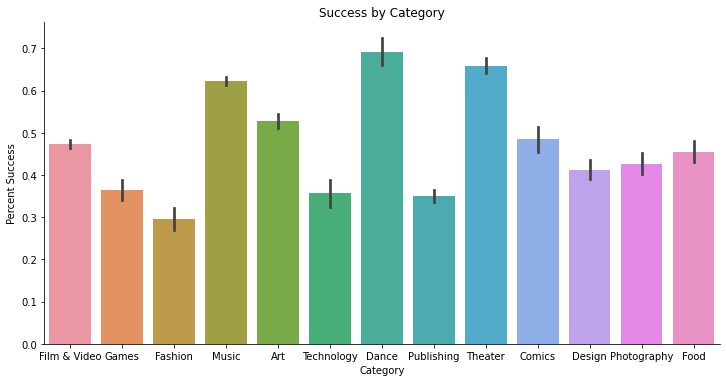

In [11]:
sns.catplot(y='status', x='category', data=new, kind='bar', height=5, aspect=2)
plt.xlabel('Category')
plt.ylabel('Percent Success')
plt.title('Success by Category')
plt.show()

In [29]:
# the above graphs indicate that the most successful categories were dance, then theater and music.
# The most successful subcategories were Indi Rock, Dance, Country and Folk.

In [7]:
# 2.4 Is there an ideal month/day/time to launch a campaign

In [19]:
# we have to look at the correlation between month/day/time and success
# first, we split month/day/time into month, day, year, time
import datetime as dt



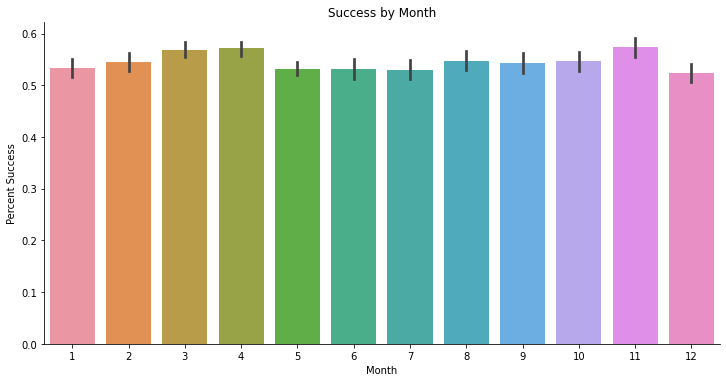

In [2]:
new_status = {'successful': True, 'failed': False, 'suspended': False, 'canceled':False}
df['new_status'] = df['status'].map(new_status)

df['DateOfMonth'] = pd.to_datetime(df['funded date']).dt.date
df['Time'] = pd.to_datetime(df['funded date']).dt.time
df['DateOfWeek'] = pd.to_datetime(df['funded date']).dt.dayofweek
df['Month'] = pd.to_datetime(df['funded date']).dt.month
df['Year'] = pd.to_datetime(df['funded date']).dt.year

sns.catplot(y='new_status', x='Month', data=df, kind='bar', height=5, aspect=2)
plt.xlabel('Month')
plt.ylabel('Percent Success')
plt.title('Success by Month')
plt.show()

In [31]:
# From the graph we see there is no correlation between the month of funding and success

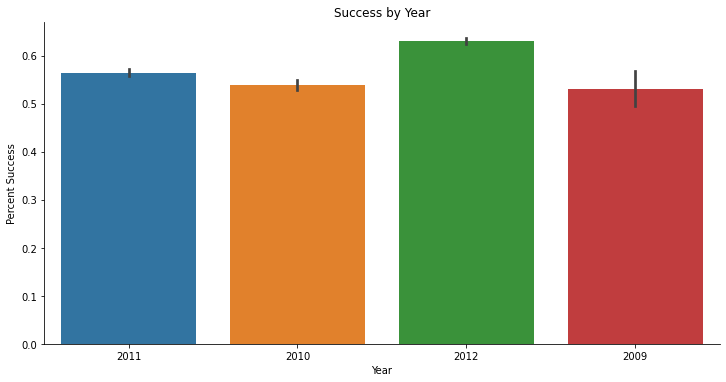

In [13]:
# year and success
sns.catplot(y='status', x='Year', data=df, kind='bar', height=5, aspect=2)
plt.xlabel('Year')
plt.ylabel('Percent Success')
plt.title('Success by Year')
plt.show()


In [23]:
# no correlation

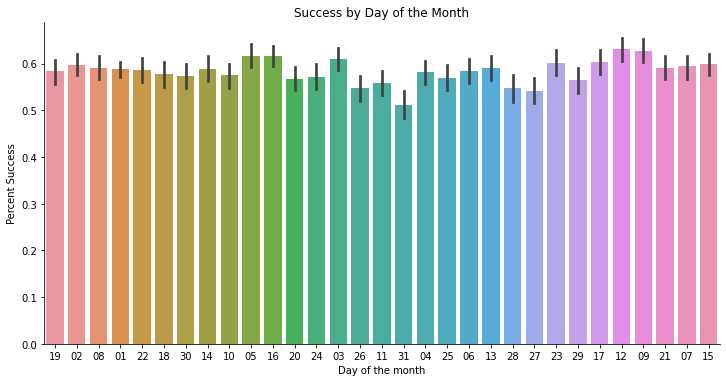

In [14]:
# day of the month and success
sns.catplot(y='status', x='DayOfMonth', data=df, kind='bar', height=5, aspect=2)
plt.xlabel('Day of the month')
plt.ylabel('Percent Success')
plt.title('Success by Day of the Month')
plt.show()


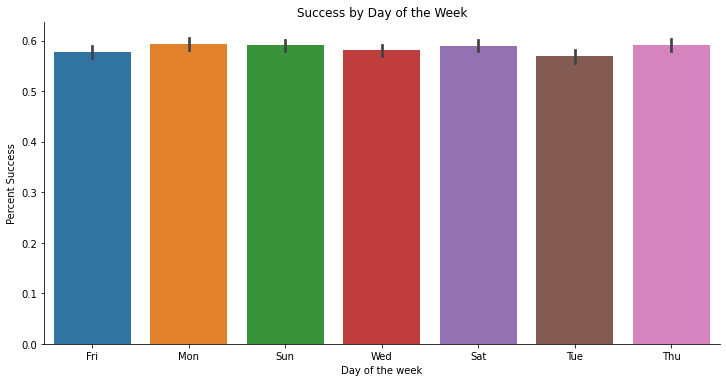

In [15]:
# day of the week and success
sns.catplot(y='status', x='DayOfWeek', data=df, kind='bar', height=5, aspect=2)
plt.xlabel('Day of the week')
plt.ylabel('Percent Success')
plt.title('Success by Day of the Week')
plt.show()


In [32]:
# no correlation between day/month/year/time and success